In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio
from plotly.subplots import make_subplots
from datetime import date, timedelta
from IPython.display import display
import seaborn as sns
sns.set_theme(style="whitegrid")

In [56]:
header_by_day = ["#","Country","Date","TotalCases","NewCases","TotalDeaths","NewDeaths","TotalRecovered","NewRecovered",
"ActiveCases","Serious,Critical","Tot Cases/1M pop","Deaths/1M pop","TotalTests","Tests/1M pop","Population","Continent"]

header_by_week = ["#", "Country", "Cases in the last 7 days", "Cases in the preceding 7 days",
"Weekly case /%/ change", "Cases in the last 7 days/1M pop", "Deaths in the last 7 days", 
"Deaths in the preceding 7 days", "Weekly Death /%/ change", "Deaths in the last 7 days/1M pop", "Population", "Continent"]

In [57]:
def RepresentsInt(s):
    try: 
        int(s)
        return True
    except ValueError:
        return False

def convert_numeric(num):
    condition = {",":"","+":"","%":""}
    if num == "nan" or num == " " or num == "  " or num == " N/A":
        return 0

    for i, j in condition.items():
        num = num.replace(i, j)
    if RepresentsInt(num) == True:
        return int(num)
    return float(num)

In [58]:
df_covid_by_day = pd.read_csv('Corona_by_day.tsv',sep='\t')

In [59]:
for i in range(3,16):
    df_covid_by_day[header_by_day[i]] = df_covid_by_day[header_by_day[i]].apply(lambda x:convert_numeric(str(x)))
    
df_covid_by_day[header_by_day[16]] = df_covid_by_day[header_by_day[16]].apply(lambda x:str(x).replace(" ",""))
df_covid_by_day['Date'] = pd.to_datetime(df_covid_by_day['Date'],format="%d-%m-%Y")

In [60]:
df_covid_by_week = pd.read_csv('Corona_by_week.tsv',sep='\t')

In [61]:
for i in range(2,11):
    df_covid_by_week[header_by_week[i]] = df_covid_by_week[header_by_week[i]].apply(lambda x:convert_numeric(str(x)))
    
df_covid_by_week[header_by_week[-1]] = df_covid_by_week[header_by_week[-1]].apply(lambda x:str(x).replace(" ",""))

In [62]:
df_covid_by_day

,#,Country,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",Tot Cases/1M pop,Deaths/1M pop,TotalTests,Tests/1M pop,Population,Continent
0,1,USA,2022-02-28,80656025,34828,975951,843,53500262,278579,26179812,7770,241322,2920,950614834,2844228,334225917,NorthAmerica
1,2,India,2022-02-28,42931045,6915,514054,211,42324550,16864,92441,8944,30610,367,767481346,547211,1402532051,Asia
2,3,Brazil,2022-02-28,28787620,19516,649443,248,26336373,152750,1801804,8318,133853,3020,63776166,296539,215068475,SouthAmerica
3,4,France,2022-02-28,22702815,13483,138367,232,20901504,235191,1662944,2484,346537,2112,246629975,3764574,65513384,Europe
4,5,UK,2022-02-28,18886701,27312,161361,46,17449650,98709,1275690,289,275806,2356,480341745,7014519,68478212,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2711,223,MS Zaandam,2022-03-11,9,0,2,0,7,0,0,0,0,0,0,0,0,nan
2712,224,Marshall Islands,2022-03-11,7,0,0,0,7,0,0,0,117,0,0,0,59864,Australia/Oceania
2713,225,Saint Helena,2022-03-11,2,0,0,0,2,0,0,0,327,0,0,0,6108,Africa
2714,226,Micronesia,2022-03-11,1,0,0,0,1,0,0,0,9,0,0,0,117058,Australia/Oceania


In [63]:
df_covid_by_day.dtypes

#                            int64
Country                     object
Date                datetime64[ns]
TotalCases                   int64
NewCases                     int64
TotalDeaths                  int64
NewDeaths                    int64
TotalRecovered               int64
NewRecovered                 int64
ActiveCases                  int64
Serious,Critical             int64
Tot Cases/1M pop             int64
Deaths/1M pop                int64
TotalTests                   int64
Tests/1M pop                 int64
Population                   int64
Continent                   object
dtype: object

In [64]:
df_covid_by_week

,#,Country,Cases in the last 7 days,Cases in the preceding 7 days,Weekly case /%/ change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Death /%/ change,Deaths in the last 7 days/1M pop,Population,Continent
0,1,S. Korea,2199245,1532521,44.0,42834.0,1499,1038,44,29.0,51344026,Asia
1,2,Germany,1391001,1127202,23.0,16513.0,1529,1270,20,18.0,84238346,Europe
2,3,Vietnam,1221623,1008776,21.0,12362.0,586,639,-8,6.0,98823902,Asia
3,4,France,461175,369007,25.0,7039.0,843,1084,-22,13.0,65518499,Europe
4,5,Netherlands,442432,410017,8.0,25724.0,101,58,74,6.0,17199180,Europe
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,El Salvador,0,0,0.0,0.0,10,20,-50,2.0,6541715,NorthAmerica
210,211,Papua New Guinea,0,243,-100.0,0.0,0,1,-100,0.0,9234315,Australia/Oceania
211,212,St. Barth,0,22,-100.0,0.0,0,0,0,0.0,9928,NorthAmerica
212,213,Saint Martin,0,35,-100.0,0.0,0,0,0,0.0,39784,NorthAmerica


In [65]:
df_covid_by_week.dtypes

#                                     int64
Country                              object
Cases in the last 7 days              int64
Cases in the preceding 7 days         int64
Weekly case /%/ change              float64
Cases in the last 7 days/1M pop     float64
Deaths in the last 7 days             int64
Deaths in the preceding 7 days        int64
Weekly Death /%/ change               int64
Deaths in the last 7 days/1M pop    float64
Population                            int64
Continent                            object
dtype: object

### Phân chia dataset theo ngày thành 6 châu lục

Tuần không cần vì các chỉ số không cho phép ta groupby, nếu groupby sẽ bị sai lệch số liệu.

In [66]:
today = date.today()
yesterday = (today - timedelta(2)).strftime("%Y-%m-%d")
yesterday

'2022-03-13'

In [67]:
yesterday = '2022-03-11'

Tuy nhiên, nhóm chúng em kết thúc vào ngày 11/3/2022 nên bây giờ ta phải để yesterday = 11/3/2022 luôn để tránh phát sinh lỗi khi chạy

In [68]:
df_covid_yesterday = df_covid_by_day[df_covid_by_day['Date'] == yesterday]

In [69]:
continent_yesterday_df = df_covid_yesterday.groupby("Continent").sum().drop("nan").reset_index()
continent_yesterday_df = continent_yesterday_df.drop(["#","Tot Cases/1M pop","Deaths/1M pop","Tests/1M pop"],axis=1)
continent_yesterday_df['Date'] = yesterday
continent_yesterday_df['Date'] = pd.to_datetime(continent_yesterday_df['Date'],format="%Y-%m-%d")

Dataframe của 6 châu lục theo ngày hôm qua. Áp dụng cho nhiều chart khác nhau.

Dataframe dựa theo thời gian cho line chart.

In [70]:
df_covid_time = df_covid_by_day.groupby("Date").sum().reset_index()
df_covid_time = df_covid_time.drop(["#","Tot Cases/1M pop","Deaths/1M pop","Tests/1M pop"],axis=1)
df_covid_time

,Date,TotalCases,NewCases,TotalDeaths,NewDeaths,TotalRecovered,NewRecovered,ActiveCases,"Serious,Critical",TotalTests,Population
0,2022-02-28,437173429,1128262,5976416,6045,366621406,2154754,60360176,74759,5864353102,7884712500
1,2022-03-01,438510827,1337398,5983229,6813,368695782,2074376,59615435,74737,5869547415,7884712500
2,2022-03-02,440290515,1590173,5992432,7756,370783860,1939726,59289172,75953,5881445441,7884917270
3,2022-03-03,440377632,1599844,5993186,7872,370787000,1942866,59371827,75953,5881556015,7885122041
4,2022-03-04,443707497,1646436,6009345,8022,374469187,1751635,58996442,71862,5897737771,7885326827
5,2022-03-05,445123567,1371131,6015068,5651,375967273,1407925,58908703,72014,5903514343,7885531595
6,2022-03-06,446397620,1158654,6020183,4135,373237627,1328479,58148380,71136,5907087283,7885736371
7,2022-03-07,447839847,1216094,6026998,4912,375661281,1799427,57141478,70224,5912809671,7885941139
8,2022-03-08,449527551,1622156,6035718,6945,377568640,1926545,56851261,69516,5922376940,7886145914
9,2022-03-09,451357530,1699924,6043267,6811,379497990,1643000,56737443,67937,5930919728,7886352337


### Câu 1,4,5 + World Chart (Toàn)

### Bar Chart

Câu 1: 
- Tổng số ca nhiễm từng châu lục so với tổng dân số
- Tổng ca test so với tổng dân số
- Biểu đồ chồng giữa 3 thông số: tổng số ca nhiễm = tổng chết + ca nhiễm trong cộng đồng + tổng hồi phục


Đầu tiên vẽ barchart so sánh tỉ lệ tổng số ca từng châu lục với tổng dân số.

In [71]:
#hàm tính tỉ lệ
def cal_ratio(x,y):
    for i in continent_yesterday_df['Continent'].values:
        ratio = x/y
    return ratio

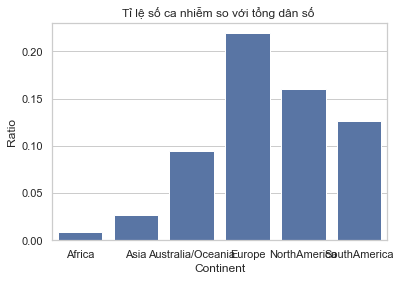

In [72]:
ratio = cal_ratio(continent_yesterday_df['TotalCases'],continent_yesterday_df['Population'])
#tạo dataframe tỉ lệ
df_case = pd.DataFrame({'Continent':continent_yesterday_df['Continent'].values, 'Ratio':ratio.values})
#vẽ barplot
sns.barplot(x="Continent", y="Ratio", data=df_case,color='b') 
plt.title('Tỉ lệ số ca nhiễm so với tổng dân số ')
plt.show()

Tương tự, ta vẽ barchart so sánh tỉ lệ số ca test so với tổng dân số của từng châu lục

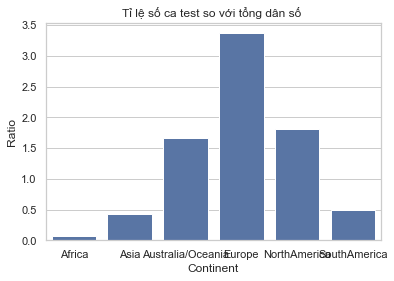

In [73]:
ratio = cal_ratio(continent_yesterday_df['TotalTests'],continent_yesterday_df['Population'])
df_test = pd.DataFrame({'Continent':continent_yesterday_df['Continent'].values, 'Ratio':ratio.values})

sns.barplot(x="Continent", y="Ratio", data=df_test,color='b') 
plt.title('Tỉ lệ số ca test so với tổng dân số ')
plt.show()


Quan sát 2 biểu đồ trên, ta thấy châu Âu có tỉ lệ số ca nhiễm và số ca test cao nhất thế giới, gần gấp đôi so với Bắc Mỹ, đứng thư 2 thế giới. Hầu hết các châu đều có tỉ lệ số ca test và số ca nhiễm ngang nhau, trừ châu Nam Mỹ, khi số ca nhiễm gấp khoảng 2,5 lần số ca test. Chứng tỏ Nam Mỹ khá tệ trong việc kiểm soát dịch bệnh.

Tiếp theo ta vẽ stacked bar chart giữa các thuộc tính tổng số ca chết, số ca hồi phục và số ca trong cộng đồng.

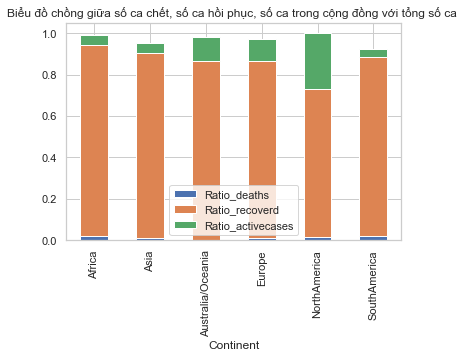

In [74]:
df = continent_yesterday_df.loc[:,['Continent','TotalCases','TotalDeaths','TotalRecovered','ActiveCases']]
ratio_deaths = cal_ratio(df['TotalDeaths'],df['TotalCases'])
ratio_recoverd = cal_ratio(df['TotalRecovered'],df['TotalCases'])
ratio_activecases = cal_ratio(df['ActiveCases'],df['TotalCases'])
df_plot = pd.DataFrame({'Continent':continent_yesterday_df['Continent'].values,
                        'Ratio_deaths':ratio_deaths.values,
                       'Ratio_recoverd':ratio_recoverd.values,
                       'Ratio_activecases':ratio_activecases.values})
df_plot.set_index('Continent').plot(kind='bar',stacked=True)
plt.title('Biểu đồ chồng giữa số ca chết, số ca hồi phục, số ca trong cộng đồng với tổng số ca ')
plt.show()

Ta thấy Bắc Mỹ có tỉ lệ số ca ngoài cộng đồng là cao nhất.

Câu 4: Biểu đồ cột bar chart của 6 châu lục về 
- Weekly Case/%/Change
- Weekly Death/%/Change


<AxesSubplot:xlabel='Continent', ylabel='Weekly case /%/ change'>

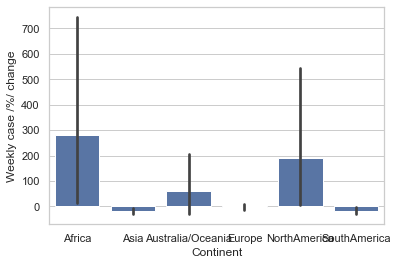

In [75]:
df = df_covid_by_week.sort_values(by=['Continent'])
sns.barplot(x="Continent", y="Weekly case /%/ change", data=df,color='b') 

<AxesSubplot:xlabel='Continent', ylabel='Weekly Death /%/ change'>

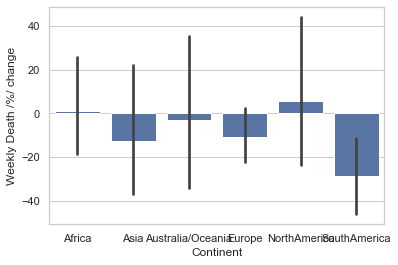

In [76]:
sns.barplot(x="Continent", y="Weekly Death /%/ change", data=df,color='b') 

(Tui chưa hiểu ý câu 4 lắm nên để hình ở trên)

Câu 5: Boxplot trên các trường dữ liệu /1M pop ở df_covid_by_week:
- Cases in the last 7 days/1M pop
- Deaths in the last 7 days/1M pop



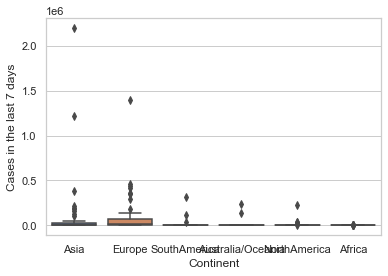

In [77]:
ax = sns.boxplot(x="Continent", y="Cases in the last 7 days", data=df_covid_by_week)

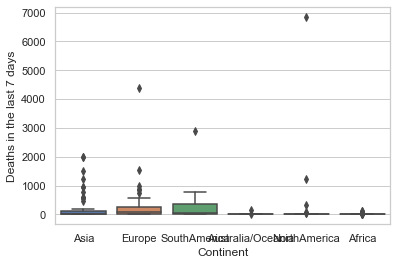

In [78]:
ax = sns.boxplot(x="Continent", y="Deaths in the last 7 days", data=df_covid_by_week)

---

### Câu 2,3,6 (Trí)

### Pie Chart

Câu 2 : 
Pie Chart để so sánh tỷ lệ % giữa 6 châu lục về các thông số 
- Số ca nhiễm MỚI
- Số ca tử vong MỚI
- Số ca hồi phục MỚI
- Số ca trong cộng đồng

Mỗi thông số là một biểu đồ, 100% chính là tổng 6 châu lục từng thông số

In [79]:
piechart_plots = continent_yesterday_df[['Continent','NewCases','NewDeaths','NewRecovered','ActiveCases']]

In [80]:
piechart_plots

,Continent,NewCases,NewDeaths,NewRecovered,ActiveCases
0,Africa,6304,94,5102,540052
1,Asia,686376,1677,347821,6379153
2,Australia/Oceania,56281,32,38824,485752
3,Europe,801055,2147,840095,17058408
4,NorthAmerica,59310,1303,186917,25701091
5,SouthAmerica,86119,749,44497,2190247


In [81]:
specs = [[{'type':'domain'}, {'type':'domain'}], [{'type':'domain'}, {'type':'domain'}]]
fig = make_subplots(rows=2, cols=2, specs = specs, 
subplot_titles=['New Cases', 'New Deaths', 'New Recovered', 'Active Cases'])

fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewCases']), 1, 1)
fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewDeaths']), 1, 2)

fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['NewRecovered']), 2, 1)
fig.add_trace(go.Pie(labels=piechart_plots['Continent'], values=piechart_plots['ActiveCases']), 2, 2)

---

### Line Chart

Linechart để trực quan theo thời gian 3 thông số NEW (cases/deaths/recovered) trên toàn bộ thế giới.

In [82]:
linechart_plots = df_covid_time[['Date','NewCases','NewDeaths','NewRecovered']]

In [83]:
linechart_plots

,Date,NewCases,NewDeaths,NewRecovered
0,2022-02-28,1128262,6045,2154754
1,2022-03-01,1337398,6813,2074376
2,2022-03-02,1590173,7756,1939726
3,2022-03-03,1599844,7872,1942866
4,2022-03-04,1646436,8022,1751635
5,2022-03-05,1371131,5651,1407925
6,2022-03-06,1158654,4135,1328479
7,2022-03-07,1216094,4912,1799427
8,2022-03-08,1622156,6945,1926545
9,2022-03-09,1699924,6811,1643000


In [84]:
fig = px.line(linechart_plots, x="Date", y=['NewCases', 'NewDeaths','NewRecovered'], markers = True, title="World Overview") 
fig.show()

Tiếp theo, ta chia từng châu lục theo thời gian với thông số giống với World.

In [85]:
continents = ["Europe","NorthAmerica","Asia","SouthAmerica","Australia/Oceania","Africa"]
df_covid_by_day_plots = df_covid_by_day[['Date','Continent','NewCases', 'NewDeaths','NewRecovered']]

In [86]:
for continent in continents:
    continent_df_day = df_covid_by_day_plots[df_covid_by_day_plots['Continent'] == continent]
    
    #continent_df_day.set_index('Date',inplace=True)
    continent_df_day = continent_df_day.groupby(by='Date').sum().reset_index()
    
    title = continent + " Overview"
    fig = px.line(continent_df_day, x="Date", y=['NewCases', 'NewDeaths','NewRecovered'], markers = True, title=title)
    fig.show()

---

### Scatter plot

Scatterplot để trực quan về mối quan hệ của hai cặp thông số:
- Tổng nhiễm / Tổng chết trên toàn thế giới.
- Ca nhiễm / ca chết trong 7 ngày gần đây / 1 triệu dân trên toàn thế giới.

In [87]:
scatterplot_df_day = df_covid_yesterday[['Country','TotalCases','TotalDeaths']]
fig = px.scatter(scatterplot_df_day, x='TotalCases', y='TotalDeaths',color='Country',title='World')
fig.update_layout(height=500, width=1200)
fig.show()

In [88]:
scatterplot_df_week = df_covid_by_week[['Country','Cases in the last 7 days/1M pop','Deaths in the last 7 days/1M pop']]
fig = px.scatter(scatterplot_df_week, x='Cases in the last 7 days/1M pop', y='Deaths in the last 7 days/1M pop',color='Country',title='With 1M POP')
fig.update_layout(height=500, width=1200)
fig.show()

---

### Heatmap

Heatmap được sử dụng để trực quan độ nóng của 6 châu lục về trường dữ liệu số ca nhiễm mới mỗi ngày. 

Các trường dữ liệu MỚI khác đều có chung mô hình nên không cần phải trực quan.

In [89]:
heatmapplot_day_df = df_covid_by_day_plots.groupby(by=['Date','Continent']).sum().reset_index()
heatmapplot_day_df = heatmapplot_day_df[heatmapplot_day_df['NewCases'] != 0]
heatmapplot_day_df['Date'] = heatmapplot_day_df['Date'].dt.strftime('%d-%m')
heatmapplot_day_df['Date'] = pd.Categorical(heatmapplot_day_df['Date'],categories=heatmapplot_day_df['Date'].unique(),ordered=True)

Text(0.5, 1.0, 'Số ca nhiễm mới mỗi ngày')

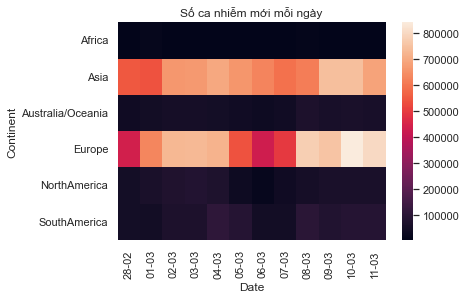

In [90]:
heatmapplot_day_df_NewCases = heatmapplot_day_df.pivot_table(index='Continent',columns='Date',values='NewCases')
ax = sns.heatmap(heatmapplot_day_df_NewCases)
ax.set_title("Số ca nhiễm mới mỗi ngày")